# XGBoost

In [1]:
#!pip3 install -U scikit-learn --upgrade # necesitamos sklearn >= 0.24

In [2]:
!pip list

Package                           Version
--------------------------------- ------------------
aext-assistant                    4.20.0
aext-assistant-server             4.20.0
aext-core                         4.20.0
aext-core-server                  4.20.0
aext_environments_server          4.20.0
aext-panels                       4.20.0
aext-panels-server                4.20.0
aext-project-filebrowser-server   4.20.0
aext-share-notebook               4.20.0
aext-share-notebook-server        4.20.0
aext-shared                       4.20.0
aext-toolbox                      4.20.0
affine                            2.4.0
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.13.3
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-

In [3]:
!pip install catboost sweetviz scikit-optimize  #  xgboost lightgbm  <- Ya están

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 25.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 4.2 MB/s eta 0:00:00a 0:00:01m


In [4]:
#!pip install ipywidgets # puede ser necesario si lo corren local

## Introducción

Vamos a trabajar con un dataset famoso llamado **adult** tomado de UCI: https://archive.ics.uci.edu/ml/datasets/Adult . Son datos obtenidos del censo de Estados Unidos de 1994 y la tarea consiste en predecir si una persona gana más de 50.000 dólares al año o no. Por lo tanto, cada fila es una persona y las columnas son las características de la misma.

In [5]:
import pandas as pd
import numpy as np

In [6]:
# https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset/ <- parcialmente basado en

df = pd.read_csv("https://github.com/palasatenea66/DATASETS/raw/main/adult_train.csv")
df.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'label'],
      dtype='object')

In [7]:
# asignar nombres correctos de columnas
# https://github.com/stn0106/ML-Datasets/blob/master/adult-train.csv
# https://github.com/stn0106/ML-Datasets/blob/master/adult.names

df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target']

In [8]:
df.shape

(32561, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- Las variables categóricas son: **workclass**, **education**, **marital-status**, **occupation**, **relationship**, **race**, **sex**, **native-country**.

- Las variables numéricas son: **age**, **fnlwgt**, **education-num**, **capital-gain**, **capital-loss**, **hours-per-week**

## Análisis exploratorio

Para este EDA vamos a usar un paquete que nos genera numerosos gráficos automáticamente y, por lo tanto, nos permite una aproximación rápida a los datos con los que vamos a trabajar.

In [10]:
# sweetviz es un paquete de análisis exploratorio automático, una alternativa también es pandas-profiling
# https://zephyrnet.com/es/conozca-sus-datos-mucho-m%C3%A1s-r%C3%A1pido-con-la-nueva-biblioteca-de-python-de-sweetviz/
# https://towardsdatascience.com/sweetviz-automated-eda-in-python-a97e4cabacde
# https://colab.research.google.com/drive/1-md6YEwcVGWVnQWTBirQSYQYgdNoeSWg?usp=sharing#scrollTo=6hs4aRB7Eupr

import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

El siguiente comando escribe un *html* con una serie de gráficos. Además, intenta abrir una pestaña nueva. Si ésto no sucede entonces deberán ejecutar manualmente el archivo. Para eso, si están en Google Colab deberán descargar el archivo y luego darle doble clic al archivo en su computadora.

In [11]:
!ls


0 - Presentación series temporales.pdf
0 - Series Temporales.pdf
1 - RANDOM_FOREST_CLASIFICADOR_TITANIC.ipynb
1 - random_forest+.pdf
2 - 0 - EXTRATREES.pdf
2 - 1 - ENSEMBLES_BAGGING_CLAS.ipynb
2 - 2 - ENSEMBLES_bagging_COMPARACION_VARIOS_MODELOS.ipynb
2 - 3 - ENSEMBLES_EXTRATREES.ipynb
2 - 4 - ENSEMBLES_random_forest_regresor_anscombe.ipynb
3 - ENSEMBLE-ARBOLES.ipynb
4 - ENSEMBLES_xgboost.ipynb
4 - XGBoost.pdf


In [12]:
advert_report.show_html('df.html')  # para verlo en el navegador

Report df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
# 'bajamos' la salida de sweetviz para visualizarla en la pc localmente

from google.colab import files
files.download('df.html')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!ls

catboost_info  df.html	output.html  sample_data



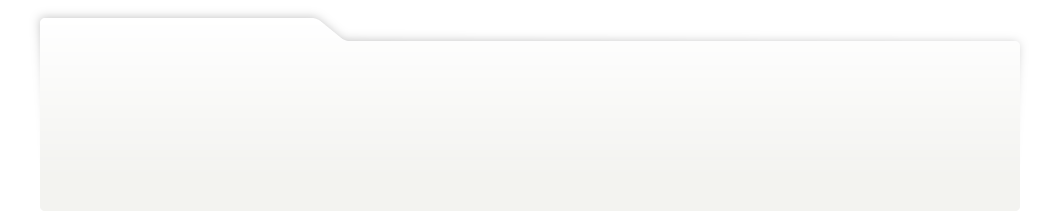
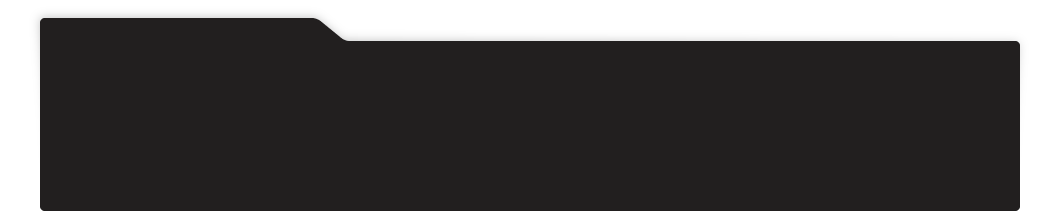
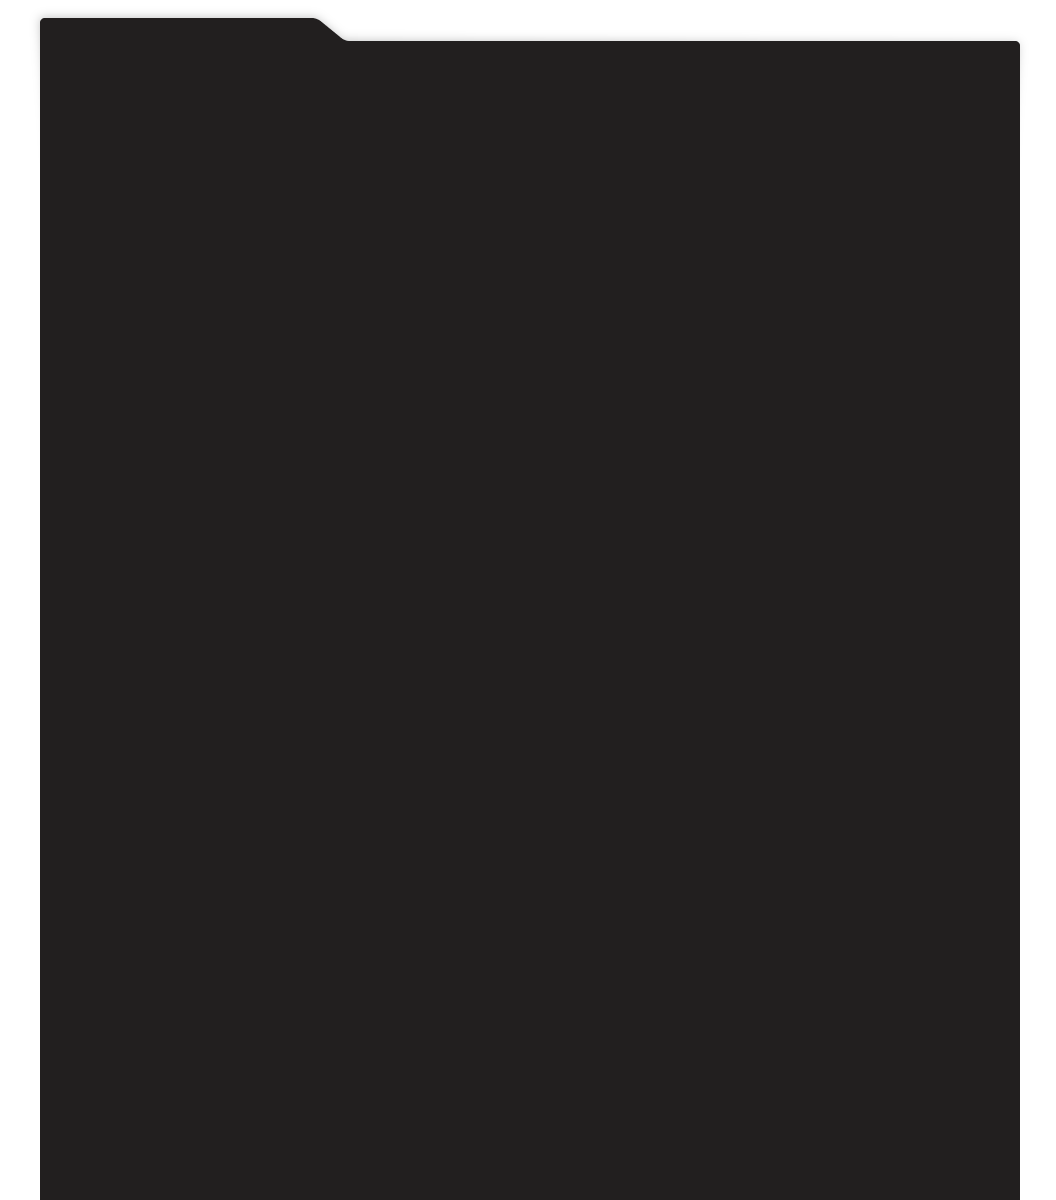
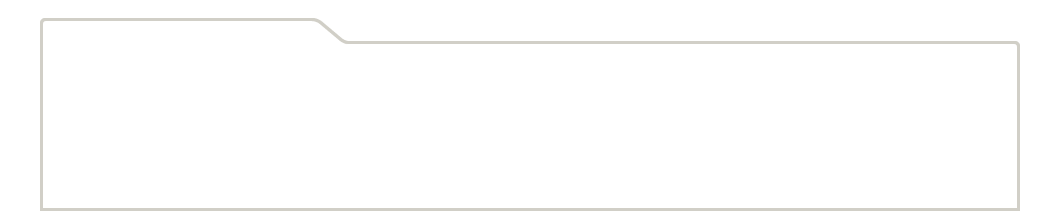
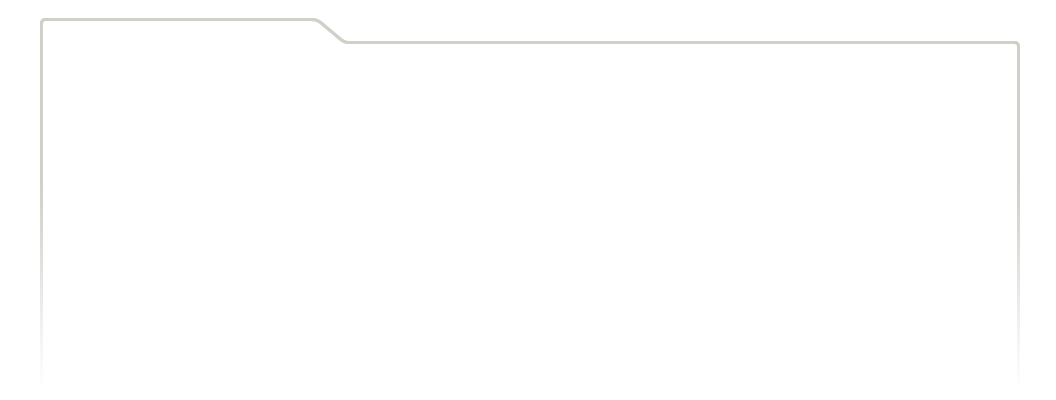
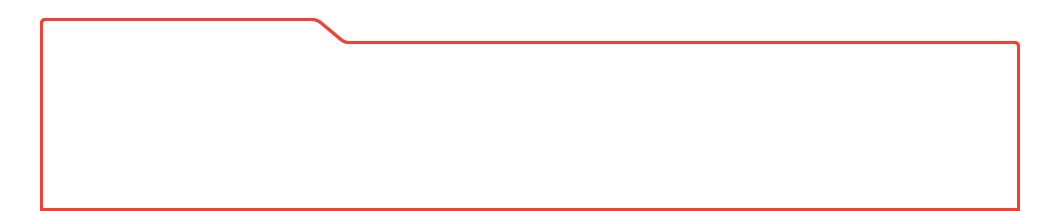
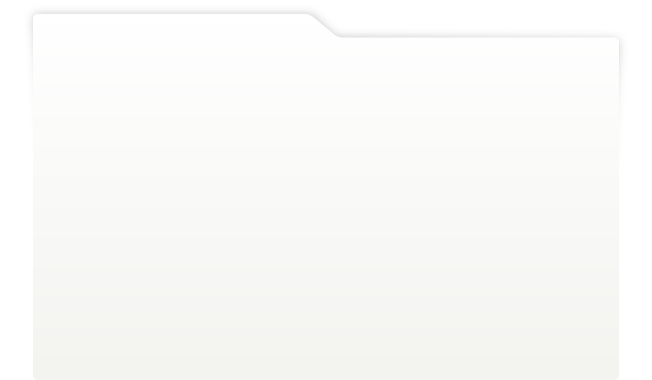
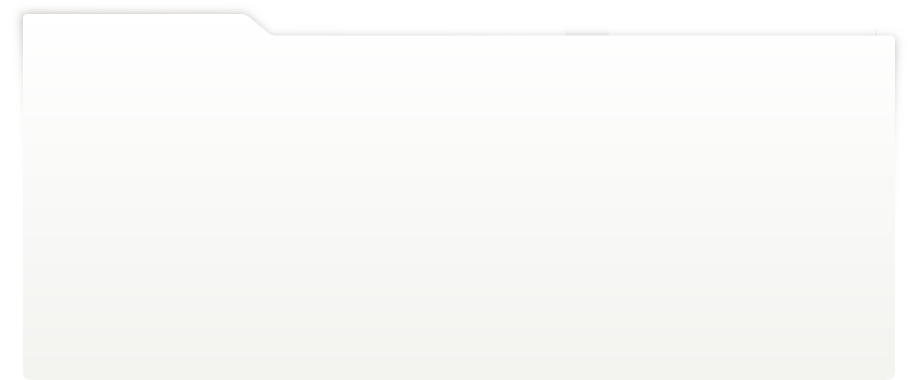
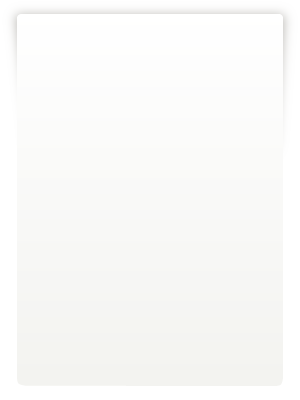
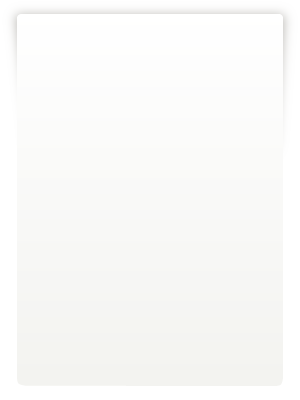
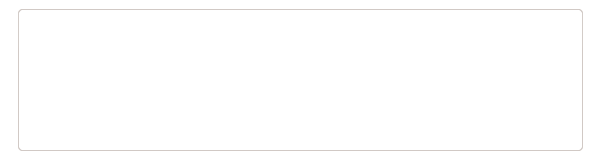
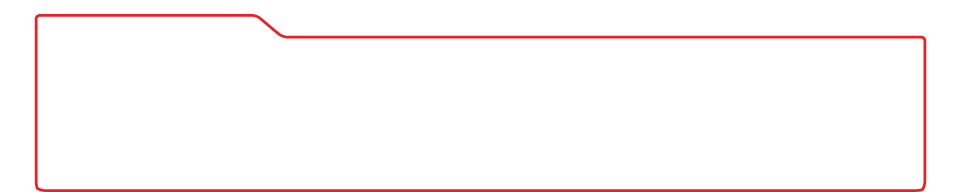
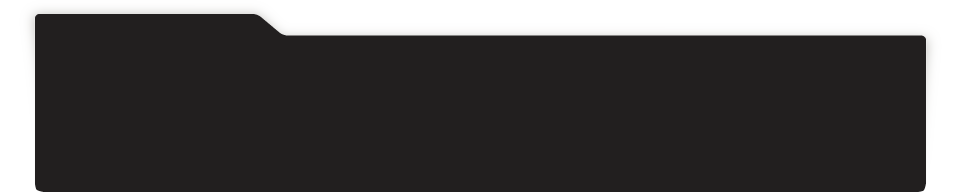
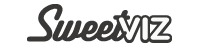
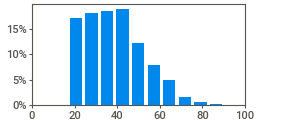
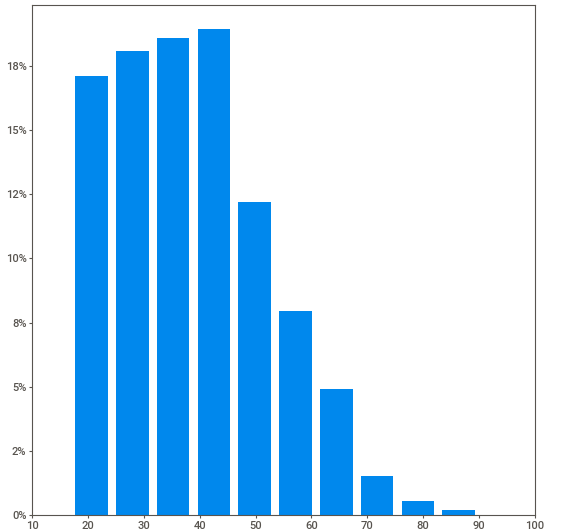
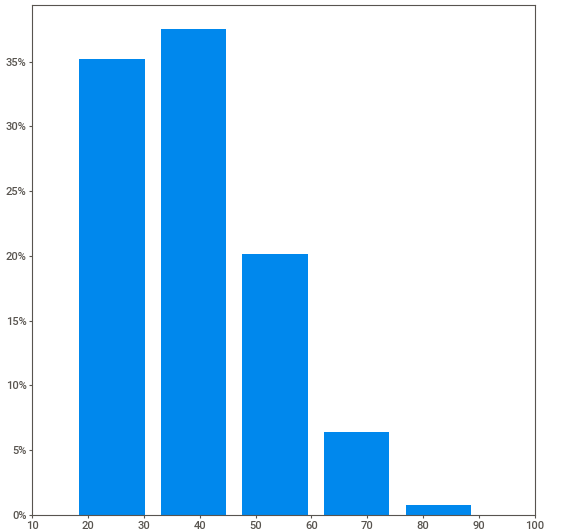
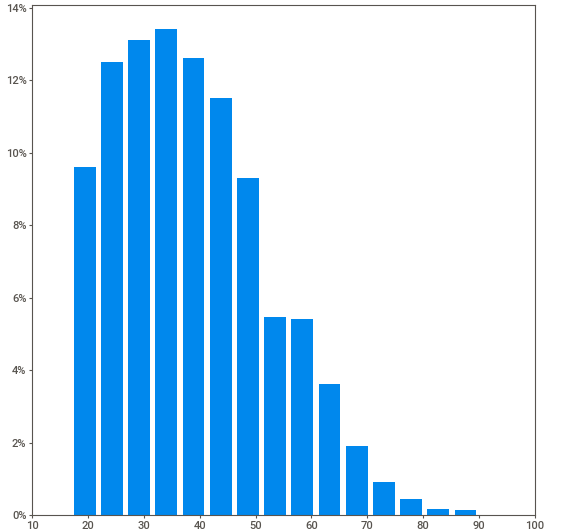
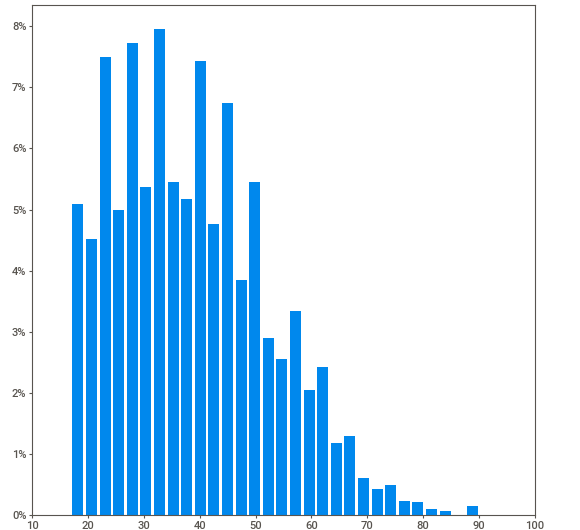
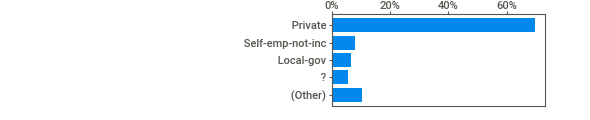
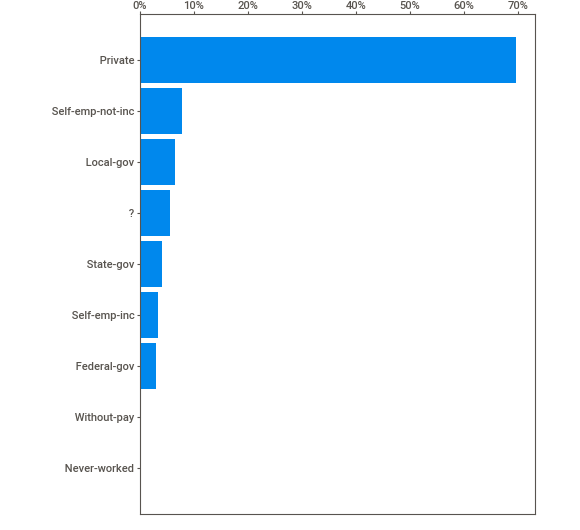
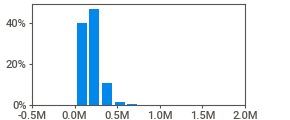
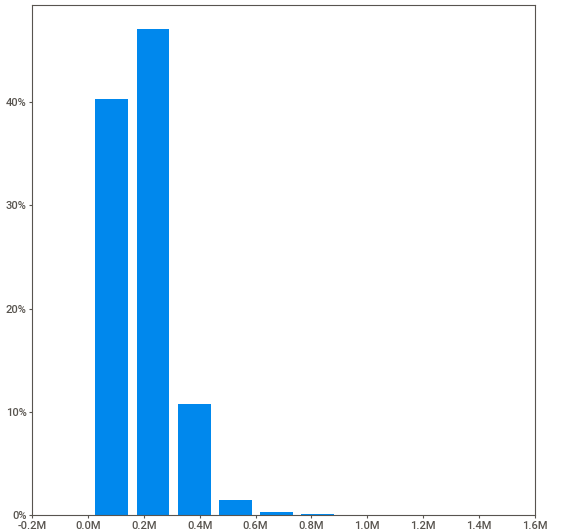
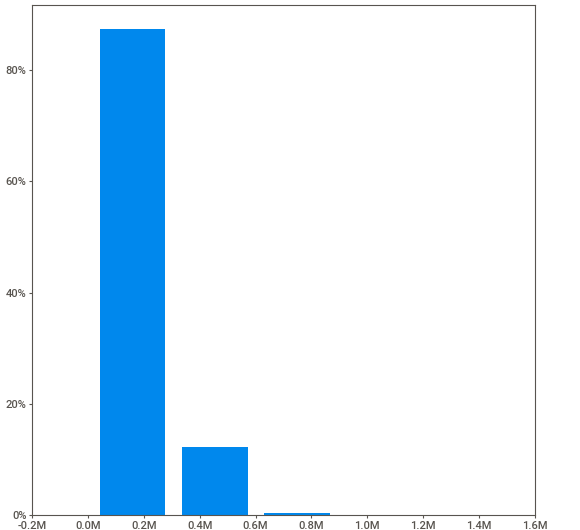
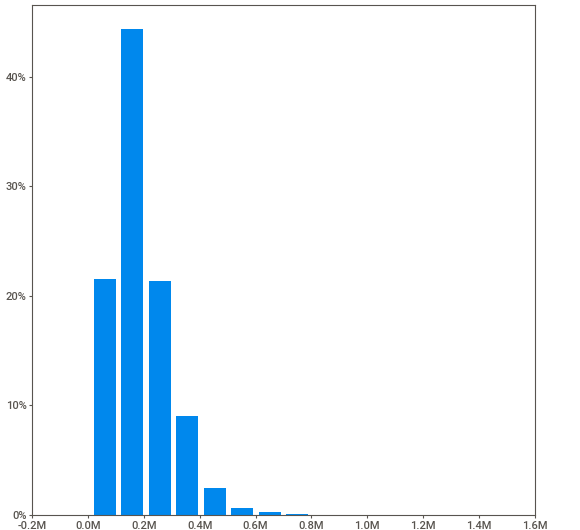
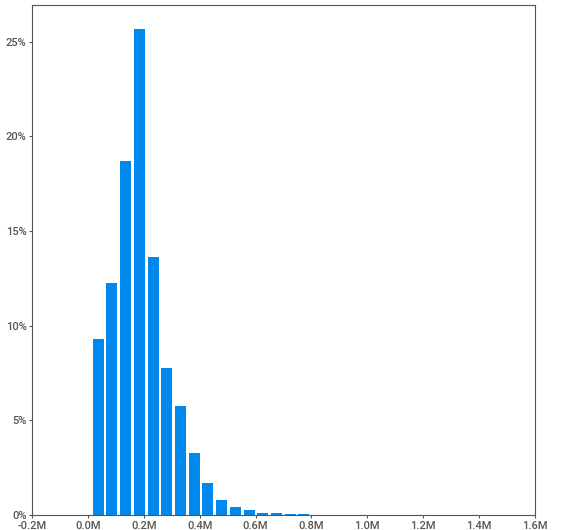
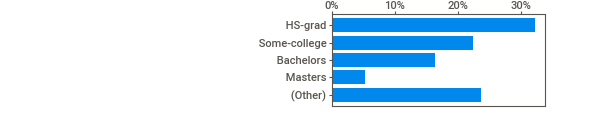
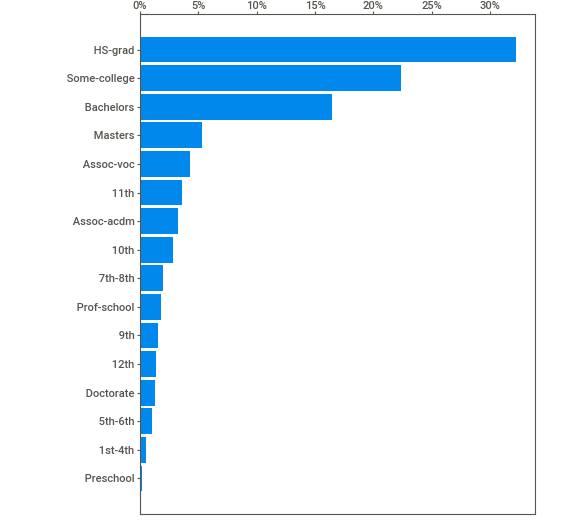
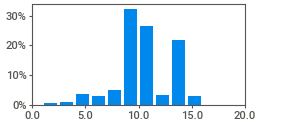
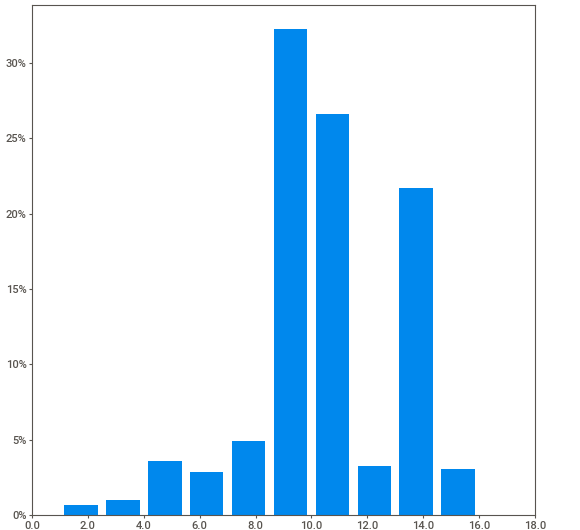
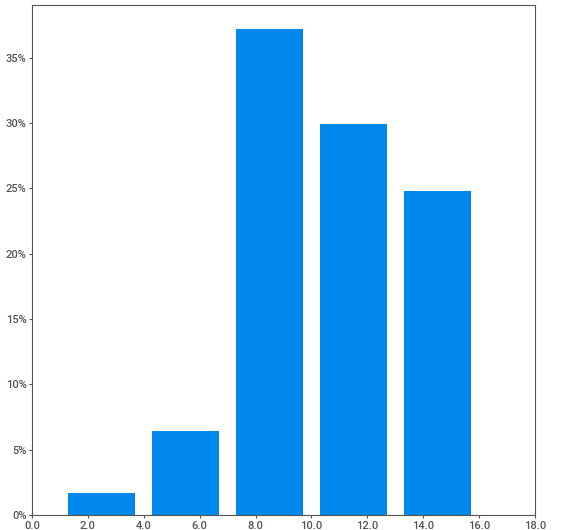
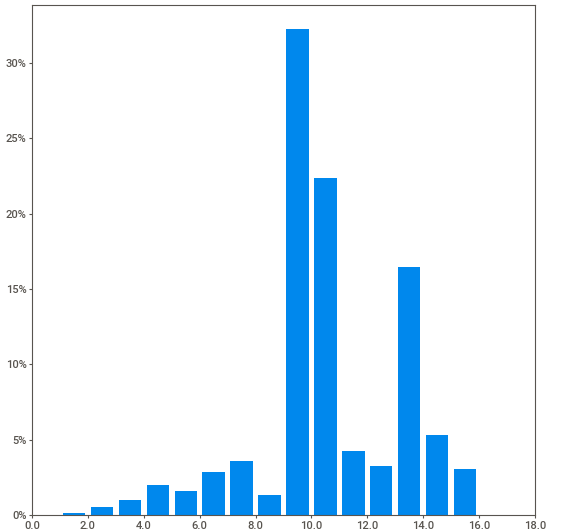
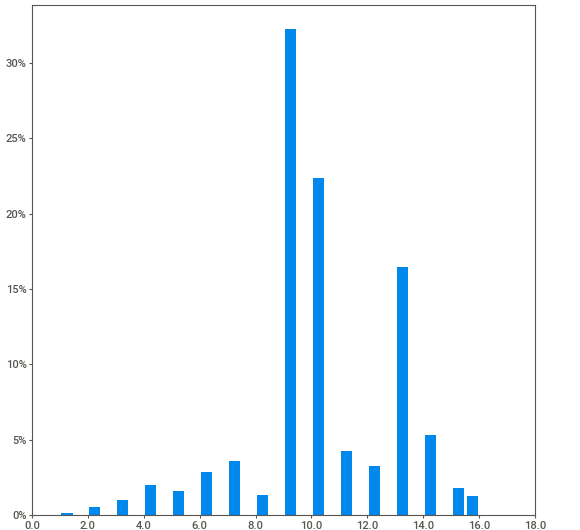
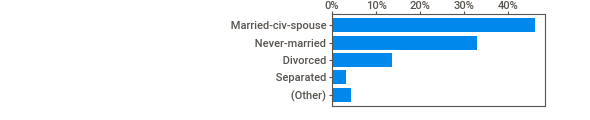
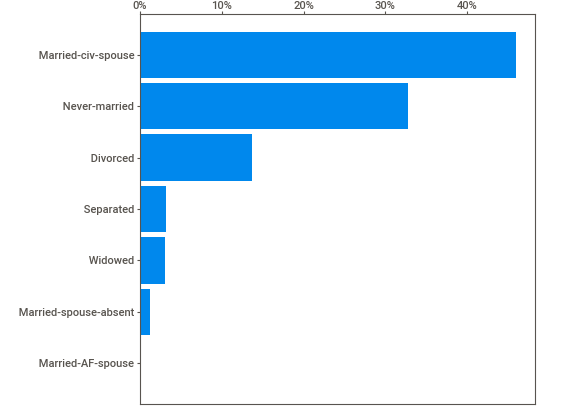
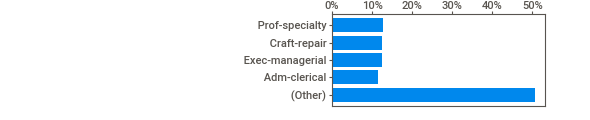
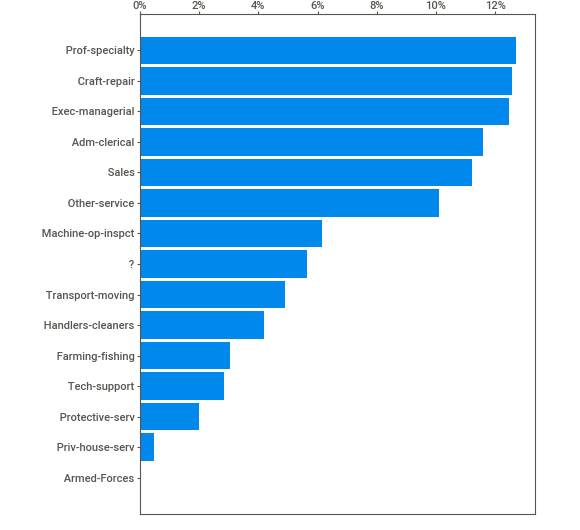
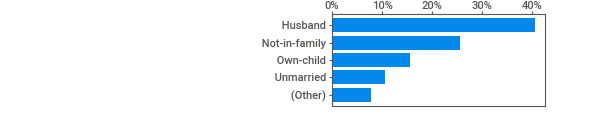
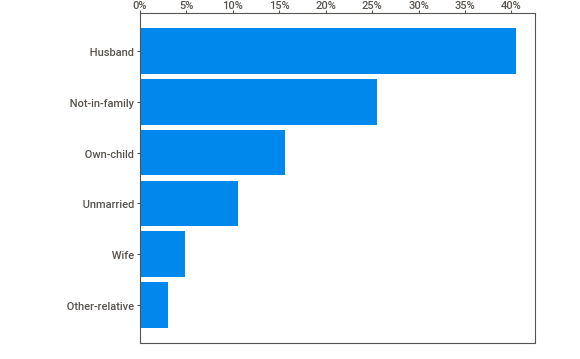
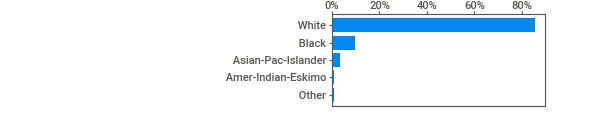
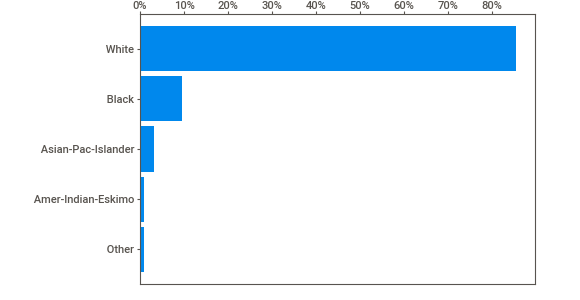
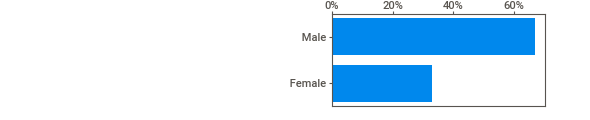
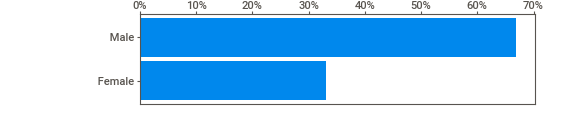
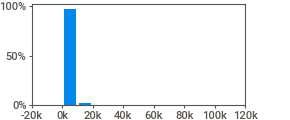
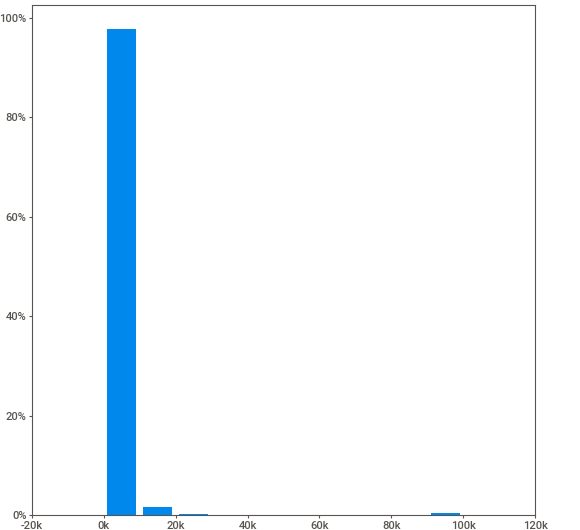
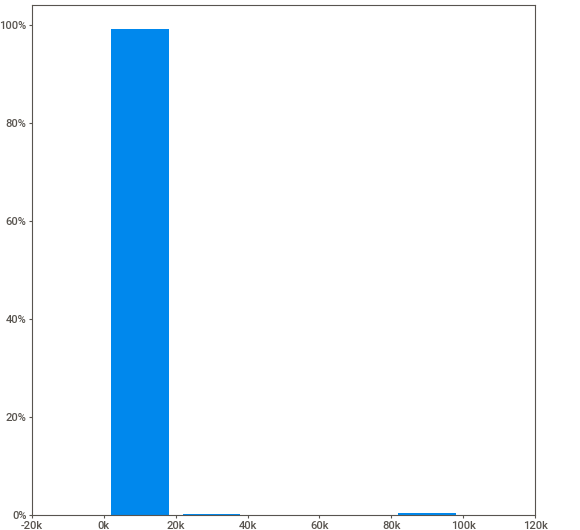
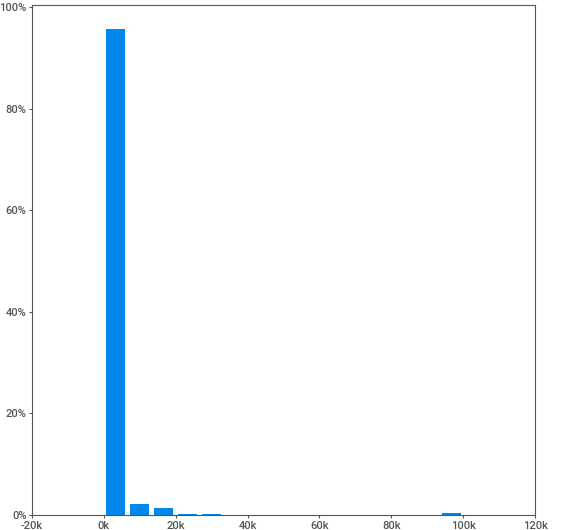
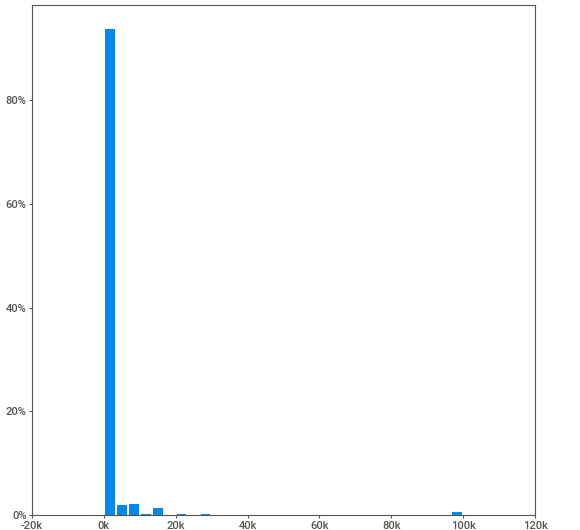
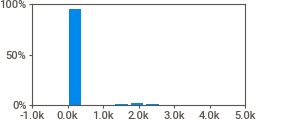
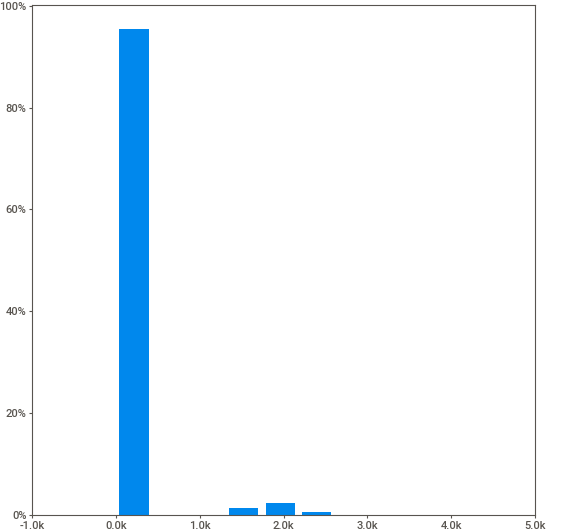
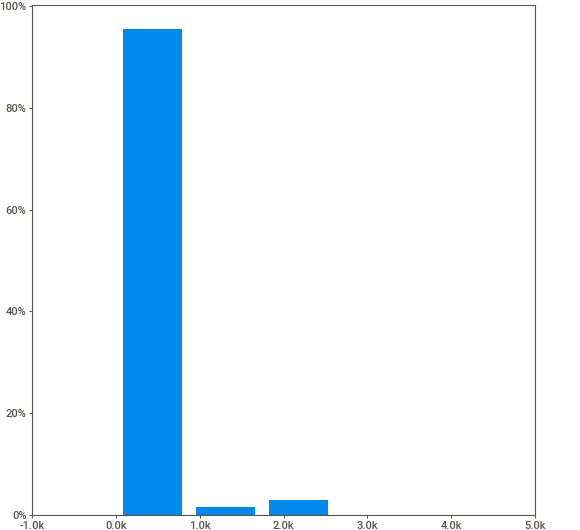
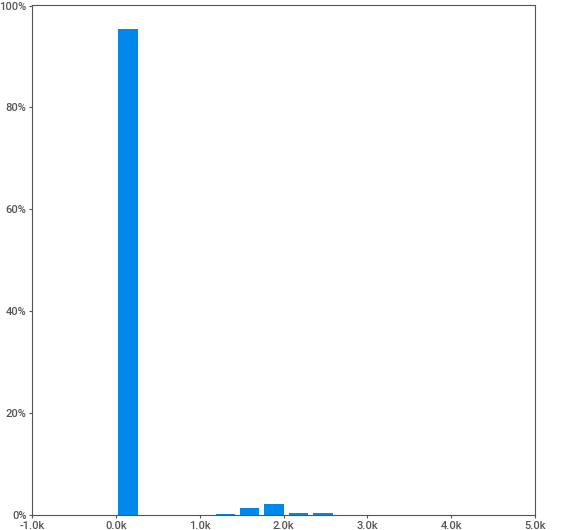
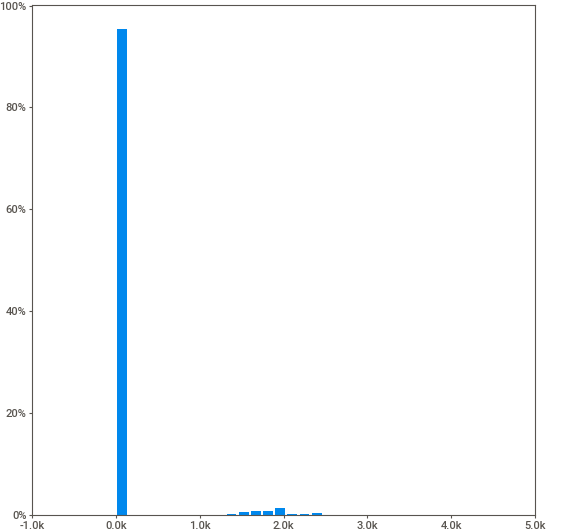
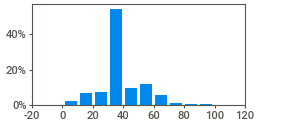
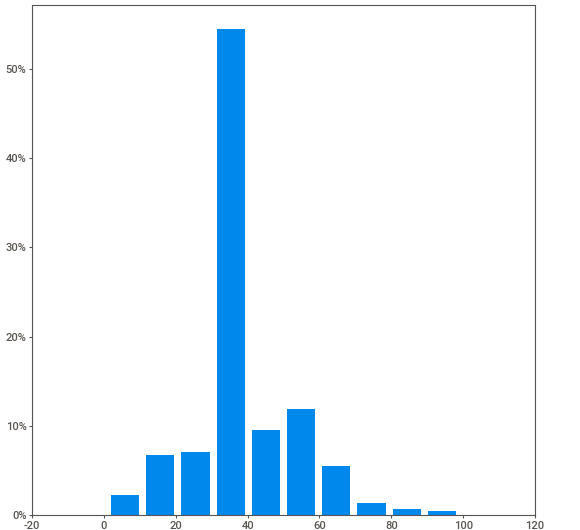
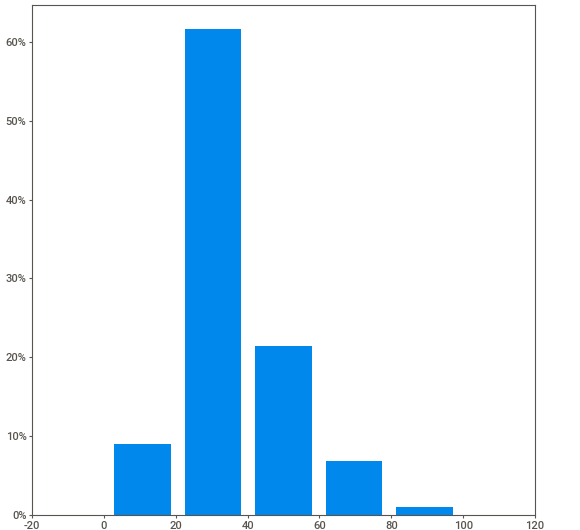
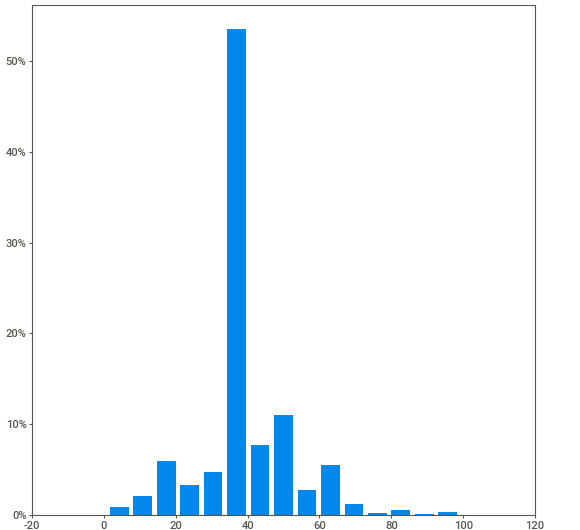
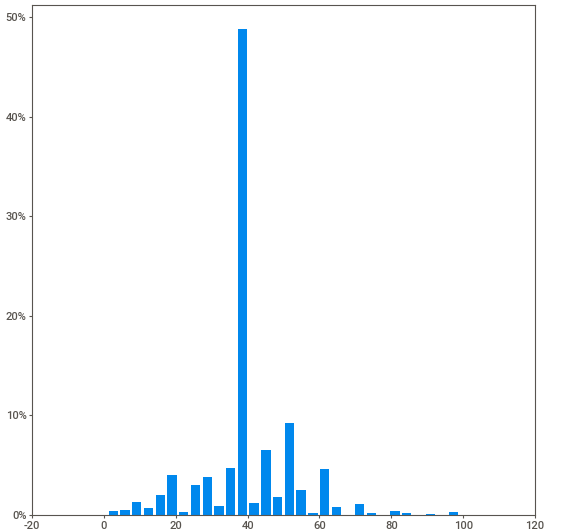
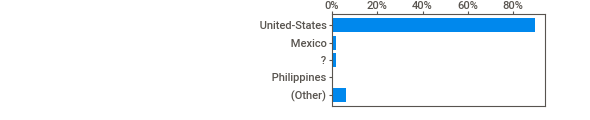
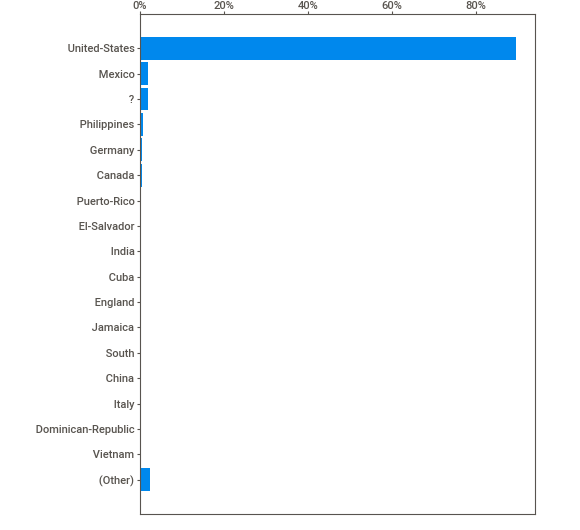
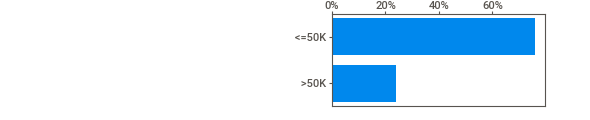
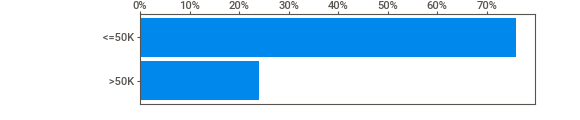
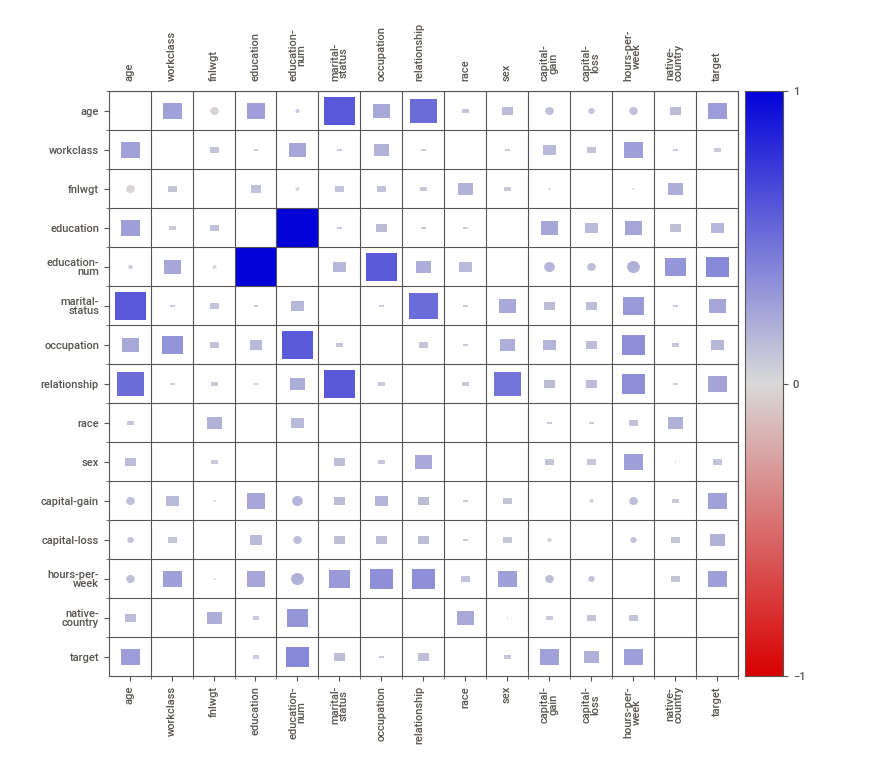
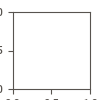

In [ ]:
advert_report.show_notebook(w="100%")    # para verlo directamente en el notebook

### Observaciones

Del reporte de *sweetviz* interesan destacar las siguientes cuestiones:


1- En **workclass** los nulos se identifican con **?**.

2- **target** no está parejamente distribuido, con 76% para la categoría **<=50K** y 24% para **>50K**.

3- **capital-gain** y **capital-loss** son variables continuas pero mayoritariamente son 0 (91.7% y 95.3% respectivamente).

Cliqueando en ASSOCIATIONS (arriba al medio) podemos ver métricas de correlación entre variables, allí se observa que:

4- **education-num**, **capital-gain**, **capital-loss**, **hours-per-week**, **age** son las variables más correlacionadas con **target**.

In [ ]:
# opción pandas-profilling, ahora llamada 'ydata-profiling'
# https://www.analyticslane.com/2019/06/12/automatizar-el-analisis-de-datos-con-pandas-profiling/
# https://www.datasource.ai/uploads/d8bd6d716a55e75759045076654f51b3.html

!pip install 'ydata-profiling[notebook]'


In [ ]:
!pip list | grep profiling   # solamente queremos ver las bibliotecas que tienen 'profiling' en el nombre

ydata-profiling                  4.10.0


l objeto ProfileReport analiza las variables, muestra estadísticas, distribuciones, valores nulos, correlaciones y posibles problemas en los datos.

In [ ]:
import ydata_profiling as prof
profile = prof.ProfileReport(df, title="Profiling Report")
profile.to_file("output.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Preparamos train y test

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [ ]:
df.replace(' ?', np.NaN, inplace=True)

In [ ]:
X_train = df.drop("target",axis=1)
y_train = df["target"]

In [ ]:
y_train

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: target, Length: 32561, dtype: object

In [ ]:
X_train

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  
0         Male          2174             0              40   United-States  
1         Male             0             0              13   United-States  
2         Male             0             0              40   United-States  
3         Male             0             0              40   United-States  
4       Female             0             0              40            Cuba  
...        ...           ...           ...             ...             ...  
32556   Female             0             0              38   United-States  
32557     Male             0             0              40   United-States  
32558   Female             0             0              40   United-States  
32559     Male             0             0              20   United-States  
32560   Female         15024             0              40   United-States  

[32561 rows x 14 columns]

In [ ]:
pd.unique(y_train)

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
# LabelEncoder se usa para codificar las labels como números
l_encoder = LabelEncoder()

In [ ]:
# Al hacer fit el objeto aprende un mapeo de cada label a un número que luego usaremos en test.
# Al hacer transform ejecuta el mapeo. fit_transform primero ejecuta fit y luego transform
y_train = l_encoder.fit_transform(y_train)
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
test = pd.read_csv("https://github.com/palasatenea66/DATASETS/raw/main/adult_test.csv")

In [ ]:
test.columns=df.columns
test

age      workclass  fnlwgt      education  education-num  \
0       25        Private  226802           11th              7   
1       38        Private   89814        HS-grad              9   
2       28      Local-gov  336951     Assoc-acdm             12   
3       44        Private  160323   Some-college             10   
4       18              ?  103497   Some-college             10   
...    ...            ...     ...            ...            ...   
16276   39        Private  215419      Bachelors             13   
16277   64              ?  321403        HS-grad              9   
16278   38        Private  374983      Bachelors             13   
16279   44        Private   83891      Bachelors             13   
16280   35   Self-emp-inc  182148      Bachelors             13   

            marital-status          occupation     relationship  \
0            Never-married   Machine-op-inspct        Own-child   
1       Married-civ-spouse     Farming-fishing          Husband   
2       Married-civ-spouse     Protective-serv          Husband   
3       Married-civ-spouse   Machine-op-inspct          Husband   
4            Never-married                   ?        Own-child   
...                    ...                 ...              ...   
16276             Divorced      Prof-specialty    Not-in-family   
16277              Widowed                   ?   Other-relative   
16278   Married-civ-spouse      Prof-specialty          Husband   
16279             Divorced        Adm-clerical        Own-child   
16280   Married-civ-spouse     Exec-managerial          Husband   

                      race      sex  capital-gain  capital-loss  \
0                    Black     Male             0             0   
1                    White     Male             0             0   
2                    White     Male             0             0   
3                    Black     Male          7688             0   
4                    White   Female             0             0   
...                    ...      ...           ...           ...   
16276                White   Female             0             0   
16277                Black     Male             0             0   
16278                White     Male             0             0   
16279   Asian-Pac-Islander     Male          5455             0   
16280                White     Male             0             0   

       hours-per-week  native-country   target  
0                  40   United-States   <=50K.  
1                  50   United-States   <=50K.  
2                  40   United-States    >50K.  
3                  40   United-States    >50K.  
4                  30   United-States   <=50K.  
...               ...             ...      ...  
16276              36   United-States   <=50K.  
16277              40   United-States   <=50K.  
16278              50   United-States   <=50K.  
16279              40   United-States   <=50K.  
16280              60   United-States    >50K.  

[16281 rows x 15 columns]

In [ ]:
test.replace(' ?', np.NaN, inplace=True)
test

age      workclass  fnlwgt      education  education-num  \
0       25        Private  226802           11th              7   
1       38        Private   89814        HS-grad              9   
2       28      Local-gov  336951     Assoc-acdm             12   
3       44        Private  160323   Some-college             10   
4       18            NaN  103497   Some-college             10   
...    ...            ...     ...            ...            ...   
16276   39        Private  215419      Bachelors             13   
16277   64            NaN  321403        HS-grad              9   
16278   38        Private  374983      Bachelors             13   
16279   44        Private   83891      Bachelors             13   
16280   35   Self-emp-inc  182148      Bachelors             13   

            marital-status          occupation     relationship  \
0            Never-married   Machine-op-inspct        Own-child   
1       Married-civ-spouse     Farming-fishing          Husband   
2       Married-civ-spouse     Protective-serv          Husband   
3       Married-civ-spouse   Machine-op-inspct          Husband   
4            Never-married                 NaN        Own-child   
...                    ...                 ...              ...   
16276             Divorced      Prof-specialty    Not-in-family   
16277              Widowed                 NaN   Other-relative   
16278   Married-civ-spouse      Prof-specialty          Husband   
16279             Divorced        Adm-clerical        Own-child   
16280   Married-civ-spouse     Exec-managerial          Husband   

                      race      sex  capital-gain  capital-loss  \
0                    Black     Male             0             0   
1                    White     Male             0             0   
2                    White     Male             0             0   
3                    Black     Male          7688             0   
4                    White   Female             0             0   
...                    ...      ...           ...           ...   
16276                White   Female             0             0   
16277                Black     Male             0             0   
16278                White     Male             0             0   
16279   Asian-Pac-Islander     Male          5455             0   
16280                White     Male             0             0   

       hours-per-week  native-country   target  
0                  40   United-States   <=50K.  
1                  50   United-States   <=50K.  
2                  40   United-States    >50K.  
3                  40   United-States    >50K.  
4                  30   United-States   <=50K.  
...               ...             ...      ...  
16276              36   United-States   <=50K.  
16277              40   United-States   <=50K.  
16278              50   United-States   <=50K.  
16279              40   United-States   <=50K.  
16280              60   United-States    >50K.  

[16281 rows x 15 columns]

In [ ]:
X_test = test.drop("target",axis=1)
y_test = test["target"]
y_test
# ojo que no son iguales a las del train

0         <=50K.
1         <=50K.
2          >50K.
3          >50K.
4         <=50K.
          ...   
16276     <=50K.
16277     <=50K.
16278     <=50K.
16279     <=50K.
16280      >50K.
Name: target, Length: 16281, dtype: object

In [ ]:
y_test.replace( " <=50K.", " <=50K", inplace=True)

In [ ]:
y_test.replace(" >50K.", " >50K", inplace=True)

In [ ]:
pd.unique(y_test)

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
# acá estamos traduciendo las etiquetas de las labels a números, con el mismo mapeo de antes (!!!!)

y_test = l_encoder.transform(y_test)

In [ ]:
# inverse_transform nos permite hacer el mapeo en el sentido opuesto, de número a label
l_encoder.inverse_transform(y_test)

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
# Para chequear que el mapeo se hace correctamente podemos hacer lo siguiente:
np.array_equal(test["target"].values, l_encoder.inverse_transform(y_test))

True

In [ ]:
# Check if y_train contains only integers:
if not np.issubdtype(y_train.dtype, np.integer):
    y_train = y_train.astype(int)

## Entreno modelos

In [ ]:
!pip install dask[dataframe]   # es necesaria por dependencias
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
import scipy.stats as st
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 12.7 MB/s eta 0:00:00


In [ ]:
cat_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

num_columns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

Se utiliza PolynomialFeatures para crear nuevas variables a partir de las variables numéricas originales, generando combinaciones polinómicas (por ejemplo, cuadrados, productos entre variables, etc.). Esto puede ayudar a los modelos a capturar relaciones no lineales entre las variables y mejorar el poder predictivo

In [ ]:
# vamos a usar polynomial features sobre las variables numéricas
poly = PolynomialFeatures()

si aparece una categoría nueva en los datos de test (que no estaba en el entrenamiento), se le asigna el valor definido en unknown_value (en este caso, 99999999). Así se evita que el pipeline falle por categorías desconocidas y se asegura que el modelo pueda procesar cualquier dato nuevo, aunque tenga valores no vistos en el entrenamiento.

In [ ]:
# Las categorías "nuevas" que aparezcan se imputan con el valor de unknown_value
o_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=99999999)

Los modelos que vamos a probar son XGBoost, LightGBM, CatBoost y Regresión logística.

Armamos un pipeline en donde:

1- Usamos `ColumnTransformer` para seleccionar las columnas numéricas y aplicar `PolynomialFeatures`. `remainder="passthrough"` hace que el resto de las columnas pasen sin cambios. De este paso vamos a optimizar el hiperparámetro que indica el grado del polinomio: `selector_num__poly__degree`.

2- Luego aplicamos una transformación sobre las variables categóricas. Para los modelos basados en árboles usamos `OrdinalEncoder` que codifica las categorías como números. De este paso vamos a optimizar el hiperparámetro que indica cómo se representan las categorías nuevas, no vistas en train, con `ord_encoder__unknown_value`. Por último, para la regresión logística aplicamos one hot encoding.

3- Finalmente aplicamos un clasificador.

Nota: los nombres de los hiperparámetros que vamos a optimizar se llaman como `nombre del step + __ + nombre del hiperparámetro`

In [ ]:
pipeline = Pipeline([("selector_num", ColumnTransformer([("poly", poly, num_columns)], remainder="passthrough", force_int_remainder_cols=False) ),
    ("cat_encoder", o_encoder),
    ("classifier", CatBoostClassifier())
    ])

In [ ]:
pipeline.get_params()

{'memory': None,
 'steps': [('selector_num',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('poly', PolynomialFeatures(),
                                    ['age', 'fnlwgt', 'education-num',
                                     'capital-gain', 'capital-loss',
                                     'hours-per-week'])])),
  ('cat_encoder',
   OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=99999999)),
  ('classifier', <catboost.core.CatBoostClassifier at 0x79c374850190>)],
 'verbose': False,
 'selector_num': ColumnTransformer(remainder='passthrough',
                   transformers=[('poly', PolynomialFeatures(),
                                  ['age', 'fnlwgt', 'education-num',
                                   'capital-gain', 'capital-loss',
                                   'hours-per-week'])]),
 'cat_encoder': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=99999999),
 'classifier': <catboost.core.CatBoostClassi

In [ ]:
one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

In [ ]:
# este diccionario de parámetros lo vamos a usar tanto para XGBoost como para LightGBM
params = {
    "classifier__n_estimators": st.randint(20,150),       # nro de árboles.
    "classifier__max_depth": st.randint(3, 12),           # máxima profundidad del árbol
    "classifier__learning_rate": st.uniform(0.05, 0.4),   # learning rate (xgb’s “eta”)
    "classifier__colsample_bytree": one_to_left,          # ratio de la muestra de las columnas a la hora de construir el árbol
    "classifier__subsample": one_to_left,                 # ratio de la muestra de las observaciones
    'classifier__reg_alpha': st.uniform(0.05,10),         # término de regularización L1
    "classifier__min_child_weight": st.uniform(1,20),     # Suma mínima del peso de la instancia (hessiano) requerida en los hijos
}

In [ ]:
other_params = {"selector_num__poly__degree": [1, 2, 3],
                "cat_encoder__unknown_value": [np.NaN, 99999999]}

Para optimizar modelos con distintos hiperparámetros se puede usar una lista de diccionarios, en donde cada diccionario es un hiperparámetro distinto.

En primer lugar, classifier "pisa" el clasificador del pipeline original, en este caso `CatBoostClassifier`.

En segundo lugar, pasamos los parámetros que definimos en `params` (usados en XGBoost y LightGBM) y `other_params` (que son los hiperparámetros que no corresponden al clasificador).

En tercer lugar, también incluímos otros hiperparámetros de los clasificadores.

In [ ]:
search_space = [{"classifier": [XGBClassifier(n_jobs=3, eval_metric="logloss", use_label_encoder=False)],
                 **params,
                 **other_params,
                "classifier__gamma": st.uniform(0, 10),             # reducción mínima de la pérdida requerida para hacer un split
                },
                {"classifier": [LGBMClassifier(n_jobs=3, verbose=-1)],
                 **params,
                 **other_params},
                {"classifier": [CatBoostClassifier(thread_count=3, verbose=False)],
                 **other_params,
                "classifier__n_estimators": st.randint(20,150),     # n. de árboles.
                "classifier__max_depth": st.randint(3, 12),         # máxima profundiad del árbol
                "classifier__learning_rate": st.uniform(0.05, 0.4), # learning rate (xgb’s “eta”)
                "classifier__subsample": one_to_left,               # ratio de la muestra de las observaciones
                },
               {"classifier": [LogisticRegression(max_iter=1000)],
                "classifier__C": [10**x for x in range(-5, 3)],
                "cat_encoder": [OneHotEncoder(handle_unknown="ignore")],
               }]

In [ ]:
model = RandomizedSearchCV(pipeline, search_space, n_iter=100, verbose=1, cv=3, error_score='raise')

In [ ]:
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = X_train[col].astype(str)

Comenzamos el entrenamiento

In [ ]:
# Cuando se entrena con todo X_train hay que tener paciencia porque tarda 20 minutos y pico (de gallina tirando a cigüeña ;( )

model.fit(X_train[:300], y_train[:300])            # RECORDAR ENTRENAR CON TODO X_TRAIN CUANDO TENGAN TIEMPO PARA ELLO

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:27:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:27:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:27:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:27:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:27:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=Pipeline(steps=[('selector_num',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('poly',
                                                                               PolynomialFeatures(),
                                                                               ['age',
                                                                                'fnlwgt',
                                                                                'education-num',
                                                                                'capital-gain',
                                                                                'capital-loss',
                                                                                'hours-per-week'])])),
                                             ('cat_encoder',
                                              OrdinalEncoder(handle_unknown='use_encoded_value',
                                                             unknown_value=99999999)),
                                             ('cla...
                                         'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78226c7ec820>,
                                         'classifier__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7822dbd67220>,
                                         'selector_num__poly__degree': [1, 2,
                                                                        3]},
                                        {'cat_encoder': [OneHotEncoder(handle_unknown='ignore')],
                                         'classifier': [LogisticRegression(max_iter=1000)],
                                         'classifier__C': [1e-05, 0.0001, 0.001,
                                                           0.01, 0.1, 1, 10,
                                                           100]}],
                   verbose=1)

Guardamos los resultados

In [ ]:
results = pd.DataFrame(model.cv_results_)

In [ ]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_cat_encoder__unknown_value', 'param_classifier',
       'param_classifier__colsample_bytree', 'param_classifier__gamma',
       'param_classifier__learning_rate', 'param_classifier__max_depth',
       'param_classifier__min_child_weight', 'param_classifier__n_estimators',
       'param_classifier__reg_alpha', 'param_classifier__subsample',
       'param_selector_num__poly__degree', 'param_cat_encoder',
       'param_classifier__C', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [ ]:
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.107388      0.010623         0.032435        0.001381   
1        0.049595      0.000671         0.015168        0.000178   
2        7.796268      0.689094         0.030111        0.000162   
3        0.027743      0.000880         0.011740        0.000431   
4        1.205074      0.020804         0.014138        0.000946   
..            ...           ...              ...             ...   
95       0.085159      0.001354         0.033449        0.002937   
96       0.098147      0.061134         0.044225        0.022891   
97       0.062430      0.021290         0.018807        0.006898   
98       1.472919      0.161304         0.016741        0.003988   
99       0.043634      0.001982         0.020773        0.001125   

    param_cat_encoder__unknown_value  \
0                         99999999.0   
1                         99999999.0   
2                         99999999.0   
3                                NaN   
4                                NaN   
..                               ...   
95                               NaN   
96                               NaN   
97                               NaN   
98                        99999999.0   
99                        99999999.0   

                                     param_classifier  \
0   XGBClassifier(base_score=None, booster=None, c...   
1   XGBClassifier(base_score=None, booster=None, c...   
2   <catboost.core.CatBoostClassifier object at 0x...   
3                   LogisticRegression(max_iter=1000)   
4   <catboost.core.CatBoostClassifier object at 0x...   
..                                                ...   
95  XGBClassifier(base_score=None, booster=None, c...   
96               LGBMClassifier(n_jobs=3, verbose=-1)   
97                  LogisticRegression(max_iter=1000)   
98  <catboost.core.CatBoostClassifier object at 0x...   
99               LGBMClassifier(n_jobs=3, verbose=-1)   

    param_classifier__colsample_bytree  param_classifier__gamma  \
0                             0.872339                 2.879346   
1                             0.828200                 8.891164   
2                                  NaN                      NaN   
3                                  NaN                      NaN   
4                                  NaN                      NaN   
..                                 ...                      ...   
95                            0.898906                 0.586267   
96                            0.789503                      NaN   
97                                 NaN                      NaN   
98                                 NaN                      NaN   
99                            0.985578                      NaN   

    param_classifier__learning_rate  param_classifier__max_depth  ...  \
0                          0.442330                          8.0  ...   
1                          0.172044                         10.0  ...   
2                          0.081661                         11.0  ...   
3                               NaN                          NaN  ...   
4                          0.254907                          9.0  ...   
..                              ...                          ...  ...   
95                         0.162720                         11.0  ...   
96                         0.402468                          6.0  ...   
97                              NaN                          NaN  ...   
98                         0.431768                         10.0  ...   
99                         0.154744                          6.0  ...   

    param_selector_num__poly__degree                       param_cat_encoder  \
0                                3.0                                     NaN   
1                                2.0                                     NaN   
2                                3.0                                     NaN   
3                  

And the winner is...

In [ ]:
model.best_estimator_

Pipeline(steps=[('selector_num',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('poly',
                                                  PolynomialFeatures(degree=1),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('cat_encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=nan)),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x7822dc4276a0>)])

Para dibujar la curva ROC, usamos `predict_proba` y luego importamos `plot_roc` de `scikitplot`.

In [ ]:
y_predicted = model.predict_proba(X_test)

In [ ]:
!pip install mljar-scikit-plot

  Preparing metadata (setup.py) ... done
  Created wheel for mljar-scikit-plot: filename=mljar_scikit_plot-0.3.12-py3-none-any.whl size=32012 sha256=e068234a1b07a555d0404e0c192cc8c0b82f77a978f8633e15895efe597ddf52
  Stored in directory: /root/.cache/pip/wheels/f1/02/59/22b0e9bcc992a79df54193032d45720f9713bd3065617ef4a5
Successfully built mljar-scikit-plot


In [ ]:
!pip list | grep scikit

mljar-scikit-plot                0.3.12
scikit-image                     0.24.0
scikit-learn                     1.5.2
scikit-optimize                  0.10.2


In [ ]:
from scikitplot.metrics import plot_roc

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

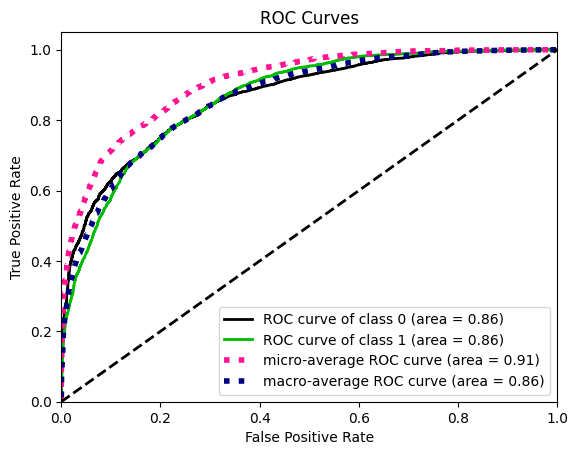

In [ ]:
plot_roc(y_test, y_predicted)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_predicted[:,1])

0.8647376445922332

## Uso CatBoost con categorical features

In [ ]:
categorical_features_indices = np.where(X_train.dtypes == object)[0]

In [ ]:
categorical_features_indices

array([ 1,  3,  5,  6,  7,  8,  9, 13])

In [ ]:
modelo = CatBoostClassifier(random_seed=42, logging_level='Silent')

In [ ]:
from catboost import Pool, metrics, cv

cv_params = modelo.get_params()
print(cv_params)

cv_params.update({'loss_function': metrics.Logloss()})
cv_data = cv(Pool(X_train[:300], y_train[:300], cat_features=categorical_features_indices),
             cv_params,
             plot=True)

{'random_seed': 42, 'logging_level': 'Silent'}


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
# obtengo la mejor epoch
mejor_epoch=int(cv_data["test-Logloss-mean"].argmin())
mejor_epoch

170

In [ ]:
# Before training and prediction:
# Convert NaN values in categorical columns to strings
for col in categorical_features_indices:
    X_train.iloc[:, col] = X_train.iloc[:, col].astype(str)  # Convert to string in training data
    X_test.iloc[:, col] = X_test.iloc[:, col].astype(str)    # Convert to string in test data


In [ ]:
# vamos a reentrenar con la mínima cantidad de steps

modelo2 = CatBoostClassifier(iterations=mejor_epoch,
                             random_seed=42,
                             logging_level='Silent',
                             cat_features=categorical_features_indices)

In [ ]:
modelo2.fit(X_train[:300], y_train[:300])

In [ ]:
predictions_probs = modelo2.predict_proba(X_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

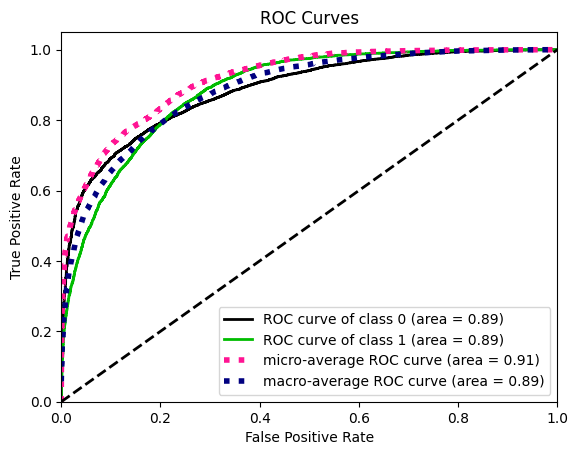

In [ ]:
plot_roc(y_test, predictions_probs)

In [ ]:
roc_auc_score(y_test, predictions_probs[:,1])

0.885685815852417